# **Librerías y carga de datos**
En esta sección se importan todas las libreríaas que son necesarias para la limpieza y transformación de los datos.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import requests
from io import StringIO

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Gestión de librerías
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib

# Modelos
# ==============================================================================
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from geopy.distance import great_circle
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import matplotlib.colors as mcolors

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Se realiza la carga de los archivos desde la fuente: https://medata.gov.co/
# Luego de realizar la carga se concatenan todos los dataframes para obtener un solo Dataset
# ==============================================================================

# Función para cargar un CSV sin verificar SSL
def load_csv_no_ssl(url):
    response = requests.get(url, verify=False)
    print(f'{url} - Status code: {response.status_code}')
    return pd.read_csv(StringIO(response.text))

# Cargar todos los archivos CSV
df_finan = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000009/hurto_a_entidad_financiera.csv')
df_comer = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000010/hurto_a_establecimiento_comercial.csv')
df_person = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000011/hurto_a_persona.csv')
df_resi = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000012/hurto_a_residencia.csv')
df_car = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000013/hurto_de_carro.csv')
df_mot = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000014/hurto_de_moto.csv')
df_semo = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000015/hurto_de_semoviente.csv')
df_pira = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000016/hurto_por_pirateria_terrestre.csv')
df_publi = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000308/hurto_a_persona_transporte_publico.csv')



https://medata.gov.co/sites/default/files/distribution/1-027-23-000009/hurto_a_entidad_financiera.csv - Status code: 200
https://medata.gov.co/sites/default/files/distribution/1-027-23-000010/hurto_a_establecimiento_comercial.csv - Status code: 200
https://medata.gov.co/sites/default/files/distribution/1-027-23-000011/hurto_a_persona.csv - Status code: 200
https://medata.gov.co/sites/default/files/distribution/1-027-23-000012/hurto_a_residencia.csv - Status code: 200
https://medata.gov.co/sites/default/files/distribution/1-027-23-000013/hurto_de_carro.csv - Status code: 200
https://medata.gov.co/sites/default/files/distribution/1-027-23-000014/hurto_de_moto.csv - Status code: 200
https://medata.gov.co/sites/default/files/distribution/1-027-23-000015/hurto_de_semoviente.csv - Status code: 200
https://medata.gov.co/sites/default/files/distribution/1-027-23-000016/hurto_por_pirateria_terrestre.csv - Status code: 200
https://medata.gov.co/sites/default/files/distribution/1-027-23-000308/hu

In [3]:
d = pd.concat([df_finan, df_comer, df_person, df_resi, df_car, df_mot, df_semo, df_pira, df_publi])
d.head(5)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-11T09:16:00.000-05:00,1.0,6.254525,-75.563680,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Banco,Candelaria,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2025-03-06T04:06:34.000-05:00
1,2017-01-20T14:24:00.000-05:00,1.0,6.203657,-75.585746,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,Belén,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2025-03-06T04:06:34.000-05:00
2,2003-01-09T15:00:00.000-05:00,1.0,6.269308,-75.594604,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Banco,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2025-03-06T04:06:34.000-05:00
3,2003-01-09T15:00:00.000-05:00,1.0,6.269308,-75.594604,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Banco,Sin dato,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2025-03-06T04:06:34.000-05:00
4,2003-01-29T09:00:00.000-05:00,1.0,6.254313,-75.568083,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Banco,Candelaria,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2025-03-06T04:06:34.000-05:00


# **Datos Originales**


Los datos originales provienen del sitio web oficial gubernamental Datos Abiertos. Estos datos contienen variables claves para la problemática de hurtos en la ciudad de Medellín, como lo son: el tipo de hurto, características de la persona hurtada y del hecho, su ubicación y fechas. Los datos se pueden extraer directamente del sitio web mediante el link de descarga.

El dataset contiene un total de 579182 registros y 36 columnas. Cada registro representa un incidente de hurto en Medellín en distintas modalidades, detallando características del suceso y del entorno. El acceso a estos datos es abierto, ya que proviene de fuentes públicas, permitiendo su uso para fines académicos.

**Tabla de variables**  

|*Nombre de la variable*|*Anterior tipo de variable*|*Descripción*|  
| - | - | - |  
|fecha_hecho|Texto|fecha en que ocurrió el hecho|  
|cantidad|Número|cantidad que debe ser entendida en el contexto de la unidad de medida (siempre es 1)|
|latitud|Número|latitud geográfica sistema de coordenadas wgs84|
|longitud|Número|longitud geográfica|
|sexo|Texto|sexo de la víctima, o cuando lo que se mide es la comisión de un delito del presunto indiciado|
|edad|Número|edad de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado|
|estado_civil|Texto|estado civil de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado|
|grupo_actor|Texto|de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado. El grupo actor indica el grupo ej. Guerrilla, Paramilitares etc|
|actividad_delictiva|Texto|actividad ilegal a la que se dedica la víctima o el presunto indiciado. Mirar en contexto con conducta|
|parentesco|Texto|parentesco entre la víctima y el presunto indiciado|
|ocupacion|Texto|ocupación de la víctima o del presunto indiciado, Mirar en contexto con conducta|
|discapacidad|Texto|condición de movilidad reducida de la víctima o indiciado|
|grupo_especial|Texto|indica grupos especiales, que están asociados de por vida a la persona y que hacen que sean más vulnerables a un hecho en particular|
|medio_transporte|Texto|medio transporte donde se movilizaba la víctima o el presunto indiciado según el caso|
|nivel_academico|Texto|nivel acádemico de la víctima o el presunto indiciado según el caso|
|testigo|Texto|indica si hubo o no un testigo de los hechos|
|conducta|Texto|es el inventario de indicadores o hechos asociados a la seguridad y convivencia|
|modalidad|Texto|es la forma como se materializa el hecho|
|caracterizacion|Texto|variable que permite analizar y tipificar la conducta|
|conducta_especial|Texto|una forma de caracterización adicional|
|arma_medio|Texto|es el arma, medio o mecanísmo con el que se comete el hecho|
|articulo_penal|Texto|artículos del código penal o del código de contravenciones de Policía|
|categoria_penal|Texto|caracterización de algunos tipos penales|
|nombre_barrio|Texto|nombre del barrio donde ocurrieron los hechos|
|codigo_barrio|Texto|código del barrio donde ocurrieron los hechos|
|codigo_comuna|Texto|código de la comuna donde ocurrieron los hechos|
|lugar|Texto|lugar donde ocurrieron los hechos. El lugar es una tipificación del urbanismo más cercano al hecho|
|sede_receptora|Texto|entidad que recepcionó el caso|
|bien|Texto|nombre del bien|
|categoria_bien|Texto|agrupación de bienes, nivel intermedio de agregación|
|grupo_bien|Texto|agrupación de bienes, nivel alto de agregación|
|modelo|Número|modelo del bien|
|color|Texto|color del bien|
|permiso|Texto|tipo de permiso de porte que tiene el bien|
|unidad_medida|Texto|unidad del bien|
|fecha_ingestion|Texto|Fecha de ingestión de los datos|

# **Datset**
Para obtener el dataset final a utilizar en la estimación de los modelos, se hizo la preparación de los datos en diferentes etapas:
1. Limpieza de datos
2. Transformaciones
3. Creación de nuevas columnas
4. Manejo de datos nulos
5. Agrupación
6. Manejo de valores atípicos


## Limpieza de datos (Data Cleaning)

In [4]:
# Se realiza una unificación de palabras no válidas
# Estas se reemplazan por nulos para luego darles su debido manejo
# También, se corrigen los tipos de datos
# ==============================================================================
d.replace('Sin dato',np.nan,inplace=True)
d.replace('Sin dato',np.nan,inplace=True)
d.replace('SIN DATO',np.nan,inplace=True)
d.replace('NaN',np.nan,inplace=True)
d.replace('nan',np.nan,inplace=True)
d.convert_dtypes()
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579182 entries, 0 to 27021
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_hecho          579182 non-null  object 
 1   cantidad             579182 non-null  float64
 2   latitud              497039 non-null  float64
 3   longitud             497039 non-null  float64
 4   sexo                 520000 non-null  object 
 5   edad                 579182 non-null  int64  
 6   estado_civil         458129 non-null  object 
 7   grupo_actor          0 non-null       float64
 8   actividad_delictiva  0 non-null       float64
 9   parentesco           0 non-null       float64
 10  ocupacion            0 non-null       float64
 11  discapacidad         0 non-null       float64
 12  grupo_especial       0 non-null       float64
 13  medio_transporte     522206 non-null  object 
 14  nivel_academico      0 non-null       float64
 15  testigo              0 

In [5]:
# Se deciden eliminar las columnas que no tienen datos
# También se eliminan columnas redundantes o no valiosas para el estudio
# ==============================================================================
d.drop(['grupo_actor', 'actividad_delictiva', 'parentesco', 'ocupacion', 'discapacidad', 'grupo_especial',
        'nivel_academico', 'testigo', 'caracterizacion','articulo_penal','categoria_penal','permiso','unidad_medida',
        'color', 'cantidad','fecha_ingestion', 'grupo_bien', 'bien','modelo','conducta_especial', 'medio_transporte', 'sede_receptora', 'codigo_barrio'], axis=1, inplace=True)

d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579182 entries, 0 to 27021
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fecha_hecho     579182 non-null  object 
 1   latitud         497039 non-null  float64
 2   longitud        497039 non-null  float64
 3   sexo            520000 non-null  object 
 4   edad            579182 non-null  int64  
 5   estado_civil    458129 non-null  object 
 6   conducta        579182 non-null  object 
 7   modalidad       550447 non-null  object 
 8   arma_medio      545805 non-null  object 
 9   nombre_barrio   571067 non-null  object 
 10  codigo_comuna   571067 non-null  object 
 11  lugar           571844 non-null  object 
 12  categoria_bien  535021 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 61.9+ MB


In [6]:
# Creación de variables con el nombre de las columnas según su tipo
# ==============================================================================
numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
catCols = d.select_dtypes(include = ["object", 'category', 'string']).columns.tolist()

# Visualización necesaria para conocer la distribución de las variables categóricas
# También  se aprovecha para visualizar su frecuencia
# ==============================================================================
for col in catCols:
  print("="*13 + f" {col} " + "="*15)
  print(d[col].value_counts())
  print()

============= fecha_hecho ===============
fecha_hecho
2018-12-05T00:00:00.000-05:00    142
2018-12-13T00:00:00.000-05:00    110
2018-12-06T00:00:00.000-05:00    105
2018-12-04T00:00:00.000-05:00     95
2018-12-07T00:00:00.000-05:00     90
                                ... 
2014-12-10T13:00:00.000-05:00      1
2019-08-23T15:50:00.000-05:00      1
2020-07-06T16:50:00.000-05:00      1
2020-09-15T13:05:00.000-05:00      1
2020-10-21T15:00:00.000-05:00      1
Name: count, Length: 243424, dtype: int64

============= sexo ===============
sexo
Hombre    331317
Mujer     188683
Name: count, dtype: int64

============= estado_civil ===============
estado_civil
Soltero(a)                262888
Casado(a)                 101800
Unión marital de hecho     73893
Divorciado(a)              14449
Viudo(a)                    5099
Name: count, dtype: int64

============= conducta ===============
conducta
Hurto a persona                      353511
Hurto de moto                         86410
Hurto a est

In [7]:
# Ya que la columna 'edad' cuenta con valores negativos, estos se reemplazan por nulos
# ==============================================================================
d['edad'] = d['edad'].replace(-1, np.nan)

In [8]:
# Se considera la variable 'fecha_hecho' importante para el estudio
# Se decide extraer de ella el día, mes y hora, ya que su subdivisión es más útil para el análisis
# ==============================================================================

# Estandarización de las variables obtenidas de 'fecha_hecho'
# ==============================================================================
d['fecha_hecho'] = pd.to_datetime(d['fecha_hecho'], errors='coerce')

# Extraer el día y el mes en nuevas columnas
# ==============================================================================
d['año'] = d['fecha_hecho'].dt.year
d['día'] = d['fecha_hecho'].dt.day
d['mes'] = d['fecha_hecho'].dt.month
d['hora'] = d['fecha_hecho'].dt.hour

# Eliminar columna Fecha (columna original)
# ==============================================================================
d.drop('fecha_hecho', axis = 1, inplace = True)

Ya que las variables categóricas cuentan con múltiples valores con poca frecuencia, se deciden realizar agrupamientos y estandarizaciones que posibiliten un mejor manejo, análisis y visualización de estas variables.

In [9]:
# Estandarización de la variable 'estado_civil'
# ==============================================================================
d['estado_civil'] = d['estado_civil'].replace({'Soltero(a)':'soltero',
                                               'Casado(a)':'en_relacion',
                                               'Divorciado(a)':'soltero',
                                               'Viudo(a)':'soltero',
                                               'Unión marital de hecho': 'en_relacion'})

In [10]:
# Agrupación de la variable 'modalidad'
# ==============================================================================
grupo_delito = {
    'Atraco': 'violentos',
    'Raponazo': 'violentos',
    'Rompimiento cerraduta': 'no_violentos',
    'Rompimiento cerradura': 'no_violentos',
    'Rompimiento de ventana': 'violentos',
    'Rompimiento de caja fuerte': 'violentos',
    'Rompimiento de pared': 'violentos',
    'Forcejeo': 'violentos',
    'Arma de fuego': 'violentos',
    'Enfrentamiento con la fuerza pública': 'violentos',
    'Desvalijar o descuartizar': 'violentos',
    'Violencia intrafamiliar': 'violentos',
    'Descuido': 'no_violentos',
    'Engaño': 'no_violentos',
    'Escopolamina': 'no_violentos',
    'Llave maestra': 'no_violentos',
    'Clonación de tarjeta': 'no_violentos',
    'Suplantación': 'no_violentos',
    'Abuso de confianza': 'no_violentos',
    'Llamada millonaria': 'no_violentos',
    'Simulando necesidad': 'no_violentos',
    'Retención de tarjeta': 'no_violentos',
    'Cosquilleo': 'no_violentos',
    'Halado': 'no_violentos',
    'Mechero': 'no_violentos',
    'Ventosa': 'no_violentos',
    'Paquete chileno': 'no_violentos',
    'Fleteo': 'no_violentos',
    'Informático': 'no_violentos',
    'Clásica': 'no_violentos',
    'Reten ilegal': 'no_violentos',
    'Comisión de delito': 'no_violentos',
    'Vandalismo': 'violentos',
    'Tóxico o agente químico': 'violentos',
    'Miedo o terror': 'violentos',
    'Taquillazo': 'violentos',
    'Retención de dinero': 'no_violentos',
    'Arreo': 'no_violentos',
    'Auto robo': 'no_violentos'
}

# Reemplazar en el DataFrame
# ==============================================================================
d['modalidad'] = d['modalidad'].replace(grupo_delito)

In [11]:
# Agrupación de la variable 'codigo_comuna'
# ==============================================================================
grupo_comuna = {
    "50": "20",
    "60": "20",
    "70": "20",
    "80": "20",
    "90": "20"

}

# Reemplazar en el DataFrame
# ==============================================================================
d['codigo_comuna'] = d['codigo_comuna'].replace(grupo_comuna)

In [12]:
# Estandarización de la variable 'arma_medio'
# ==============================================================================
arma_tipo_replace = {
    'Arma de fuego': 'Con_Arma',
    'Arma cortopunzante': 'Con_Arma',
    'Objeto contundente': 'Con_Arma',
    'Llave maestra': 'Sin_arma',
    'Escopolamina': 'Con_Arma',
    'Palanca': 'Con_Arma',
    'Perro': 'Sin_arma',
    'Tóxico o Químico': 'Con_Arma',
    'No': 'Sin_arma'
}

# Reemplazar en el DataFrame
d['arma_medio'] = d['arma_medio'].replace(arma_tipo_replace)

In [13]:
# Diccionario de agrupamiento de la varible 'lugar'
# ==============================================================================
agrupamiento_lugares = {

     'interiores': [
        'Terminal de transporte', 'Aeropuerto', 'Estación del Metro',
        'Metro Plus', 'Puente peatonal', 'Peaje','Vehículo particular',
        'Sistema Metro', 'Transporte fluvial o marítimo','Metro',
        'Bus de servicio público',  'Banco', 'Almacén tienda y otro', 'Fábrica o empresa', 'Local comercial',
        'Supermercado', 'Restaurante', 'Centro comercial', 'Casa de apuesta',
        'Compraventa', 'Panadería', 'Bar o cantina', 'Plaza de mercado',
        'Estación de gasolina', 'Centro de belleza o estética', 'Billar',
        'Cafetería', 'Consultorio jurídico', 'Joyería', 'Droguería o farmacia',
        'Plaza de toros', 'Prostíbulo', 'Lavadero de carros', 'Teatro',
        'Café internet', 'Librería', 'Estadero', 'Estación del Metro plus',
        'Paradero de bus', 'Hipodromo',  'Estación de gasolina',
        'Feria de ganado', 'Empresa de transporte', 'Desguazadero',
        'Matadero, carnicería y similar','Taller mecánico','Casino',
        'Vía pública', 'Puesto de trabajo', 'Casa de apuesta', 'Bodega',
        'Conjunto residencial', 'Residencia', 'Hotel, motel y hostal',
        'Sede social, club, auditorio o similar', 'Finca', 'Albergue',
        'Hogar de paso', 'Casa o apartamento', 'Caseta de vigilancia empresa',
        'Caseta vigilancia conjunto residencial', 'Sede política','Edificio','Oficina',
        'Gimnasio', 'Teatro', 'Terminal del norte', 'Terminal del sur', 'Sabaneta',
        'Copacabana', 'Otro', 'La Estrella', 'Girardota', 'Caldas', 'Barbosa',
        'Instalación gubernamental', 'Instalación judicial', 'Instalación fuerza pública',
        'Corporación',  'Policía comunitaria', 'Grupo de protección infancia y adolescencia',
        'Laboratorios de procesamiento de droga ílicita',
        'Obra en construcción', 'Montallanta',  'Cárcel', 'Cantera',
        'Hospital o centro de salud' ,'Institución educativa (jardín, primaria o secundaria)',
        'Iglesia', 'Biblioteca','Baño','Funeraria y sala de velación','Institución de educación superior',
        'otros', 'Mina',

    ],


     'exteriores': [
        'Zona boscosa', 'Quebrada o rio', 'Reserva natural', 'Represa o laguna',
        'Parqueadero','Escenario deportivo','Piscina','Vía pública','Cementerio', 'Zona despoblada',
        'Parque','Lote baldío','Cajero electrónico','Turístico','Potrero'
    ]
  }

mapa_lugares = {lugar: categoria for categoria, lugares in agrupamiento_lugares.items() for lugar in lugares}

# Reemplazar en el DataFrame
# ==============================================================================
d['lugar'] = d['lugar'].replace(mapa_lugares)

d['lugar'] = d['lugar'].replace({'Bus de servicio público': 'transportes',
                                 'Metro': 'transportes'})

In [14]:
# Diccionario de agrupamiento de la varible 'categoria_bien'
# ==============================================================================
agrupamiento_objetos = {
    'vehiculos': [
        'Vehículos de 2 o 4 ruedas', 'Automóvil', 'Camionetas', 'Buses',
        'Vehículo panel', 'Transporte de carga pesada', 'Vehículo emergencias',
        'Transporte aire', 'Transporte agua', 'Otras formas de transporte'
    ],

    'alto_valor': [
        'Dinero, joyas, piedras preciosas y título valor', 'Tecnología', 'Software',
        'Licor', 'Prendas de vestir y accesorios', 'Accesorios del hogar', 'Muebles',
        'Electrodomésticos', 'Elementos escolares', 'Librería, Papelería y útiles',
        'Elementos para actividades al aire libre', 'Alimento', 'Artículos médicos',
        'Medicamento', 'Artículos de fumador', 'Drogas estimulantes', 'Drogas alucinógenas',
        'Arte', 'Música', 'Documentos', 'Elementos para la iluminación'
    ],

    'materiales': [
        'Arma de fuego', 'Munición', 'Arma blanca', 'Contundentes', 'Explosivo',
        'Pólvora', 'Accesorios militares, policía o vigilancia privada', 'Maquinaria y equipo',
        'Maquinaria pesada', 'Herramientas', 'Materiales y elementos para la construcción',
        'Equipamiento vías y señalización', 'Equipamiento servicios públicos', 'Materia prima',
        'Autoparte y elementos de la mecánica automotriz', 'Inmuebles', 'Elementos para la publicidad',
        'Elementos para guardar o almacenar', 'Flora', 'Fauna', 'Químicos', 'Combustible','Sin dato mercancías'
        ,'Otros elementos'
    ]
}
mapa_lugares = {objeto: categoria for categoria, objetos in agrupamiento_objetos.items() for objeto in objetos}

# Reemplazar en el DataFrame
# ==============================================================================
d['categoria_bien'] = d['categoria_bien'].replace(mapa_lugares)


Luego de hacer el agrupamiento y estandarización, se vuelve a visualizar las distribuciones de las variables.

In [15]:
# Obtención de nombres de columnas: categóricas y numéricas
# ==============================================================================
numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
catCols = d.select_dtypes(include = ["object", 'category', 'string']).columns.tolist()

# Revisión final de las transformaciones
# ==============================================================================

for col in catCols:
  print("="*13 + f" {col} " + "="*15)
  print(d[col].value_counts())
  print()

============= sexo ===============
sexo
Hombre    331317
Mujer     188683
Name: count, dtype: int64

============= estado_civil ===============
estado_civil
soltero        282436
en_relacion    175693
Name: count, dtype: int64

============= conducta ===============
conducta
Hurto a persona                      353511
Hurto de moto                         86410
Hurto a establecimiento comercial     54399
Hurto a residencia                    42673
Hurto de carro                        39571
Hurto por piratería terrestre          2202
Hurto a entidad financiera              289
Hurto de semoviente                     127
Name: count, dtype: int64

============= modalidad ===============
modalidad
no_violentos    282173
violentos       268273
Vehículo             1
Name: count, dtype: int64

============= arma_medio ===============
arma_medio
Sin_arma    275769
Con_Arma    270036
Name: count, dtype: int64

============= nombre_barrio ===============
nombre_barrio
La Candelaria           

## Creación de nuevas columnas
Tomando en cuenta la importancia de los barrios, se crean una nueva columna llamada Zonas, la cual facilita el análisis a grandes rasgos.

De manera análoga, se crea la variable 'rango_hora' a partir de la hora de los hechos.

In [16]:
# Creación de la columna 'zona'
# ==============================================================================
agrupamiento_barrios = {
    'Centro': ['La Candelaria', 'El Poblado', 'Laureles', 'Estadio', 'San Diego', 'Guayaquil', 'El Tesoro', 'La Alpujarra', 'La Floresta', 'Plaza de Ferias', 'Robledo', 'Sevilla', 'Granada'],
    'Zona Norte': ['Villa Nueva', 'Los Colores', 'La Aguacatala', 'Bomboná No.1', 'Barrio Colombia', 'Calle Nueva', 'Los Pinos', 'Castilla', 'Guayabal', 'Pedregal', 'Alejandría'],
    'Zona Sur': ['La Mota', 'Lorena', 'Manrique Central No.1', 'San Benito', 'La América', 'Villa Carlota', 'Barrio Colón', 'Los Balsos No.2', 'San Javier No.2'],
    'Occidente': ['Los Naranjos', 'Las Acacias', 'Perpetuo Socorro', 'Calasanz', 'San Bernardo', 'Boston', 'Villa Carlota', 'Campo Valdés No.1', 'La Mota', 'Laureles'],
    'Zona Oriente': ['Campo Amor', 'Las Violetas', 'Diego Echavarría', 'Los Ángeles', 'Aures No.2', 'La Palma', 'San Javier No.2', 'Los Alcázares', 'San Joaquín'],
    'Periferia': ['Pedregal', 'Bello Horizonte', 'Corazón de Jesús', 'San Miguel', 'Las Playas', 'Travesias', 'Trinidad', 'Aures No.1', 'El Rincón', 'Santa Fé'],
    'Otros': ['Universidad de Antioquia', 'Astorga', 'Olaya Herrera', 'San Javier No.1', 'El Pinal', 'Villa Guadalupe', 'Los Alcázares']
}

# Función para clasificar
# ==============================================================================
def clasificar_zona(barrio):
    for zona, barrios in agrupamiento_barrios.items():
        if barrio in barrios:
            return zona
    return 'Centro'


# Creación de columna
# ==============================================================================
d['zona'] = d['nombre_barrio'].apply(clasificar_zona)
d.drop('nombre_barrio', axis = 1, inplace = True)


In [17]:
# Creación de la columna 'rango_hora'
# ==============================================================================
def clasificar_hora(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

# Aplicamos la función a la columna 'hora' y creamos una nueva columna 'rango_hora'
# ==============================================================================
d['rango_hora'] = d['hora'].apply(clasificar_hora)

d.drop('hora', axis = 1, inplace = True)

## Manejo de Datos Nulos
En primera medida se busca entender cómo están distribuidos los datos nulos con el fin de encontrar posibles patrones.


In [18]:
# Se visualiza nuevamente la información del dataset para identificar la columnas con valores nulos
# ==============================================================================
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579182 entries, 0 to 27021
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitud         497039 non-null  float64
 1   longitud        497039 non-null  float64
 2   sexo            520000 non-null  object 
 3   edad            515059 non-null  float64
 4   estado_civil    458129 non-null  object 
 5   conducta        579182 non-null  object 
 6   modalidad       550447 non-null  object 
 7   arma_medio      545805 non-null  object 
 8   codigo_comuna   571067 non-null  object 
 9   lugar           571844 non-null  object 
 10  categoria_bien  535021 non-null  object 
 11  año             579182 non-null  int32  
 12  día             579182 non-null  int32  
 13  mes             579182 non-null  int32  
 14  zona            579182 non-null  object 
 15  rango_hora      579182 non-null  object 
dtypes: float64(3), int32(3), object(10)
memory usage: 68.5+ MB


In [19]:
# Latitud y longitud
# ==============================================================================
print(f'Cantidad de valores nulos en latitud y longitud: {d["latitud"].isna().sum() / d.shape[0]*100} %')

# Se eliminan datos nutos en latitud y longitud por la inapropiedad de imputacion
# ==============================================================================
d = d[d['latitud'].isna() == False]



Cantidad de valores nulos en latitud y longitud: 14.182588547296012 %


In [20]:
# sexo
# ==============================================================================
print(f'Cantidad de valores nulos en sexo: {d["sexo"].isna().sum() / d.shape[0]*100} %')

# Se realiza imputacion de valores nulos por metodo de distrubucion proporcional
# ==============================================================================

# Obtener proporciones de cada categoría
probs = d["sexo"].value_counts(normalize=True)

# Imputar valores nulos con una selección aleatoria basada en la distribución existente
d.loc[d["sexo"].isna(), "sexo"] = np.random.choice(probs.index, size=d["sexo"].isna().sum(), p=probs.values)



Cantidad de valores nulos en sexo: 10.37041358927569 %


In [21]:
# lugar
# ==============================================================================
print(f'Cantidad de valores nulos en lugar: {d["lugar"].isna().sum() / d.shape[0]*100} %')

# Se realiza imputacion de valores nulos por metodo de distrubucion proporcional
# ==============================================================================

# Obtener proporciones de cada categoría
probs = d["lugar"].value_counts(normalize=True)

# Imputar valores nulos con una selección aleatoria basada en la distribución existente
d.loc[d["lugar"].isna(), "lugar"] = np.random.choice(probs.index, size=d["lugar"].isna().sum(), p=probs.values)

Cantidad de valores nulos en lugar: 0.9594820527161853 %


In [22]:
# edad
# ==============================================================================
print(f'Cantidad de valores nulos en edad: {d["edad"].isna().sum() / d.shape[0]*100} %')


# Se realiza imputacion de valores nulos utilizando la mediana
# ==============================================================================
d["edad"].fillna(d["edad"].median(), inplace=True)

Cantidad de valores nulos en edad: 11.073175344389474 %


In [23]:
# estado_civil
# ==============================================================================
print(f'Cantidad de valores nulos en estado_civil: {d["estado_civil"].isna().sum() / d.shape[0]*100} %')

# Se realiza imputacion de valores nulos por metodo de distrubucion proporcional
# ==============================================================================

# Obtener proporciones de cada categoría
probs = d["estado_civil"].value_counts(normalize=True)

# Imputar valores nulos con una selección aleatoria basada en la distribución existente
d.loc[d["estado_civil"].isna(), "estado_civil"] = np.random.choice(probs.index, size=d["estado_civil"].isna().sum(), p=probs.values)

Cantidad de valores nulos en estado_civil: 13.987232390214851 %


In [24]:
# modalidad
# ==============================================================================
print(f'Cantidad de valores nulos en modalidad: {d["modalidad"].isna().sum() / d.shape[0]*100} %')

# Se realiza imputacion de valores nulos por metodo de distrubucion proporcional
# ==============================================================================

# Obtener proporciones de cada categoría
probs = d["modalidad"].value_counts(normalize=True)

# Imputar valores nulos con una selección aleatoria basada en la distribución existente
d.loc[d["modalidad"].isna(), "modalidad"] = np.random.choice(probs.index, size=d["modalidad"].isna().sum(), p=probs.values)


Cantidad de valores nulos en modalidad: 4.31072813199769 %


In [25]:
# arma_medio
# ==============================================================================

print(f'Cantidad de valores nulos en arma_medio: {d["arma_medio"].isna().sum() / d.shape[0]*100} %')

# Se realiza imputacion de valores nulos por metodo de distrubucion proporcional
# ==============================================================================

# Obtener proporciones de cada categoría
probs = d["arma_medio"].value_counts(normalize=True)

# Imputar valores nulos con una selección aleatoria basada en la distribución existente
d.loc[d["arma_medio"].isna(), "arma_medio"] = np.random.choice(probs.index, size=d["arma_medio"].isna().sum(), p=probs.values)



Cantidad de valores nulos en arma_medio: 4.877484462989826 %


In [26]:
# codigo_comuna
# ==============================================================================
print(f'Cantidad de valores nulos en codigo_comuna: {d["codigo_comuna"].isna().sum() / d.shape[0]*100} %')

# Se eliminan datos nutos por su baja proporcion
d = d[d['codigo_comuna'].isna() == False]

Cantidad de valores nulos en codigo_comuna: 0.032391824384002066 %


In [27]:
# grupo_bien
# ==============================================================================
print(f'Cantidad de valores nulos en grupo_bien: {d["categoria_bien"].isna().sum() / d.shape[0]*100} %')

# Se eliminan datos nutos por su baja proporcion
d = d[d['categoria_bien'].isna() == False]

Cantidad de valores nulos en grupo_bien: 0.6880964743860666 %


## Manejo de valores atípicos
En este caso se tomaron en cuenta la variable de salidad y la edad.

El resto de las columnas numéricas no se tomaron en cuenta porque estas hacen referencia a códigos o fechas y no a valores numéricos como tal.

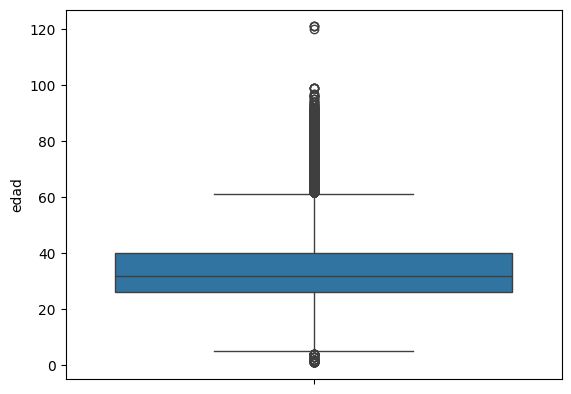

In [28]:
# Descripción de las variables para entender sus mínimos y máximos
# ==============================================================================
d['edad'].describe()


# Box plot de la variable 'edad' para visualizar su distribución
# ==============================================================================
sns.boxplot(d['edad'])
plt.show()


Valor atípico inferior:5.0
Valor atípico superior:89.0


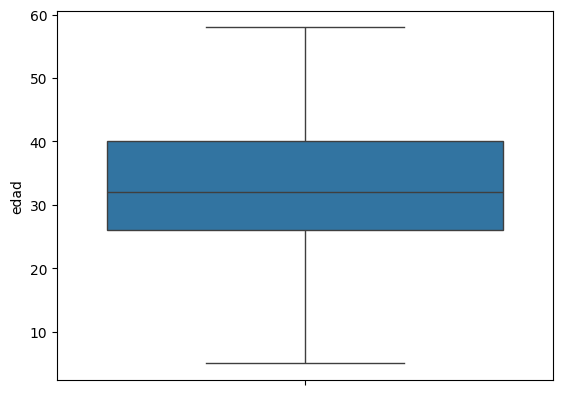

In [29]:
# Calculo de valores atípicos en 'edad' por medio de percentiles
# ==============================================================================

# Calculo del percentil inferior y el superior
Qinf = np.percentile(d['edad'], 25, interpolation = 'midpoint')
Qsup = np.percentile(d['edad'], 75, interpolation = 'midpoint')

# Cálculo del rango intercuartil
IQR = Qsup - Qinf

# Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Qinf - 1.5*IQR
# Se toma un límite superior más alto para tomar en cuenta que a las personas de avanzada edad también sufren robos
VASup = Qsup + 3.5*IQR

print(f'Valor atípico inferior:{VAInf}')
print(f'Valor atípico superior:{VASup}')

# Se eliminan los valores atípicos
d = d.drop(d[d['edad']>VASup].index)
d = d.drop(d[d['edad']<VAInf].index)

# Se reinicia el índice
d.reset_index(drop=True, inplace=True)

from scipy.stats.mstats import winsorize

# Aplicar winsorización al 5% superior
d["edad"] = winsorize(d["edad"], limits=[0, 0.05])

# Box plot de la variable 'edad' para visualizar su distribución
sns.boxplot(d['edad'])
plt.show()

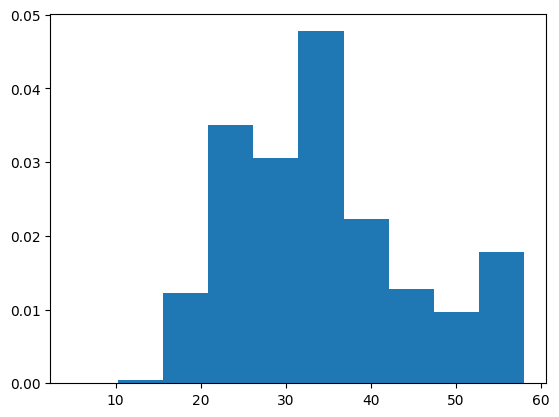

In [30]:
hist = plt.hist(d['edad'], density=True)
plt.show()

## Balance de los datos

In [31]:
# Librerías
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Factor de Inflación de la Varianza VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Función para graficar atributos en barras, pair plot o box-plot
def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):

    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],

                            )

            elif plot_type == 'barplot':
                # Boxplot
                sns.barplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            estimator='sum',
                            order=data.groupby(column)[target_var].sum().reset_index().sort_values(by=target_var, ascending=False)[column]
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")



        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot

In [32]:
# Distribución de cada variable categórica en el conjunto de datos
numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
catCols = d.select_dtypes(include = ["object", 'category', 'string']).columns.tolist()

**Distribución de las variables categóricas**

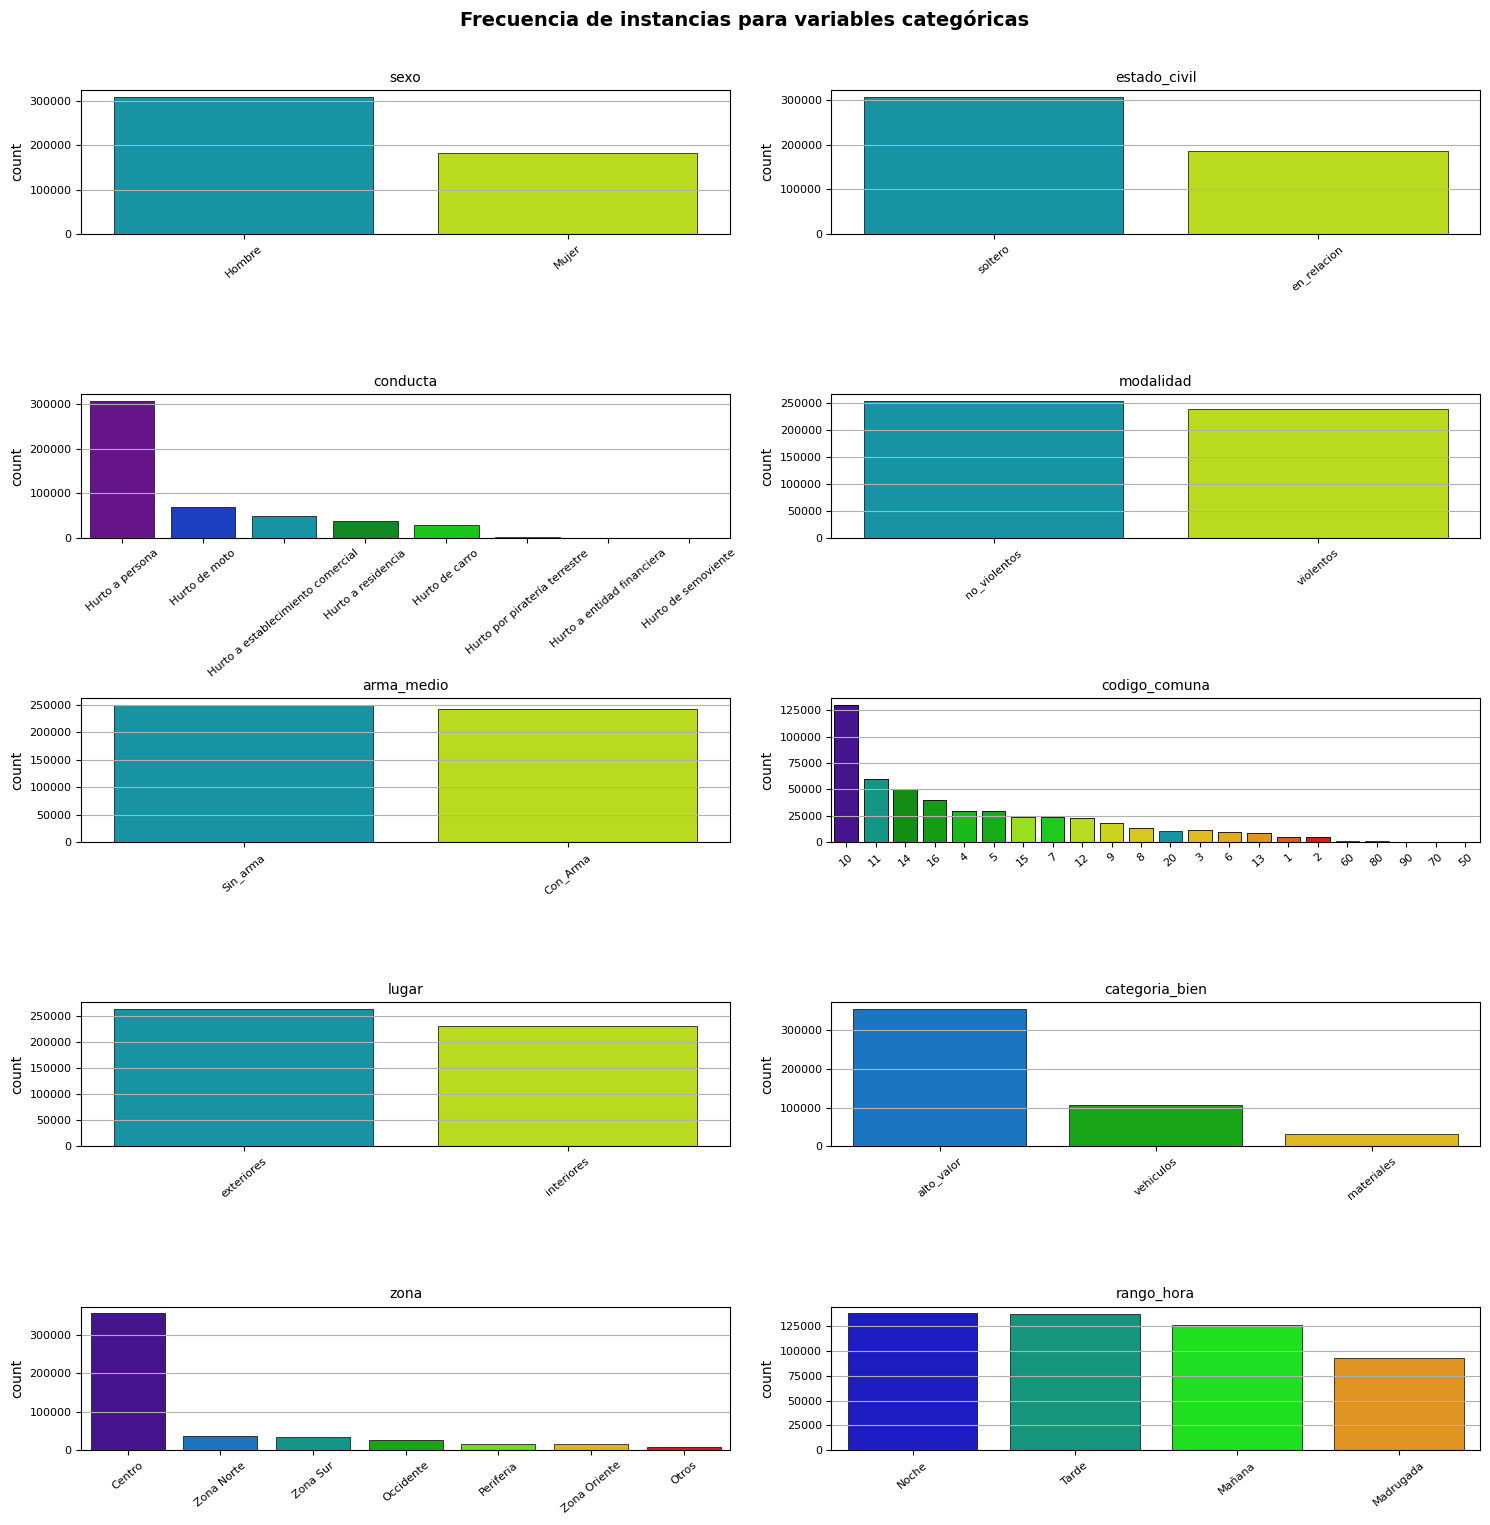

In [33]:
# Se simplifica el nombre de la variable
cols = catCols

data = d.reset_index()

# Visualización de frecuencia de instancias para variables categóricas
# ==============================================================================
multiple_plot(2, data , cols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',40)

# Decodificacion y normalizado

In [34]:
d.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492988 entries, 0 to 492987
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitud         492988 non-null  float64
 1   longitud        492988 non-null  float64
 2   sexo            492988 non-null  object 
 3   edad            492988 non-null  float64
 4   estado_civil    492988 non-null  object 
 5   conducta        492988 non-null  object 
 6   modalidad       492988 non-null  object 
 7   arma_medio      492988 non-null  object 
 8   codigo_comuna   492988 non-null  object 
 9   lugar           492988 non-null  object 
 10  categoria_bien  492988 non-null  object 
 11  año             492988 non-null  int32  
 12  día             492988 non-null  int32  
 13  mes             492988 non-null  int32  
 14  zona            492988 non-null  object 
 15  rango_hora      492988 non-null  object 
dtypes: float64(3), int32(3), object(10)
memory usage: 54.5+ 

In [35]:
# Forzado de correcion tipo de dato
# ==============================================================================

d['edad'] = d['edad'].astype(int)
d['codigo_comuna'] = d['codigo_comuna'].astype(int)

In [36]:
# Decodificacion de variables categorias
# ==============================================================================

d_decod = d.copy()


# Diccionario para guardar los encoders
encoders = {}

# Codificar las columnas categóricas
for col in d_decod.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    d_decod[col] = le.fit_transform(d_decod[col].astype(str))
    encoders[col] = le

# Guardar los encoders
joblib.dump(encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [37]:
d_decod.head()

,latitud,longitud,sexo,edad,estado_civil,conducta,modalidad,arma_medio,codigo_comuna,lugar,categoria_bien,año,día,mes,zona,rango_hora
0,6.254525,-75.563680,1,32,1,0,1,0,10,1,0,2017,11,1,4,1
1,6.203657,-75.585746,0,32,0,0,1,0,15,1,0,2017,20,1,0,3
2,6.269308,-75.594604,1,32,0,0,1,0,11,1,0,2003,9,1,4,3
3,6.269308,-75.594604,1,32,1,0,1,0,11,1,0,2003,9,1,4,3
4,6.254313,-75.568083,1,32,1,0,1,0,10,1,0,2003,29,1,0,1


In [38]:
# Normalizacion del dataset
# ==============================================================================

d_normalize = d_decod.copy()

# Inicializar el scaler
scaler = StandardScaler()

# Aplicar el escalado a todo el DataFrame
d_normalize = pd.DataFrame(scaler.fit_transform(d_normalize), columns=d_normalize.columns)

# Guardar el scaler para desescalar después
joblib.dump(scaler, "standard_scaler.pkl")



['standard_scaler.pkl']

In [39]:
d_normalize.head()

,latitud,longitud,sexo,edad,estado_civil,conducta,modalidad,arma_medio,codigo_comuna,lugar,categoria_bien,año,día,mes,zona,rango_hora
0,0.176321,0.030085,1.301672,-0.2154,0.776866,-2.089357,1.030498,-1.013832,-0.102244,1.069124,-0.600282,0.111759,-0.516455,-1.650185,1.512197,-0.599263
1,-1.333749,-0.026594,-0.768243,-0.2154,-1.287223,-2.089357,1.030498,-1.013832,0.800986,1.069124,-0.600282,0.111759,0.503422,-1.650185,-0.545270,1.256729
2,0.615180,-0.049346,1.301672,-0.2154,-1.287223,-2.089357,1.030498,-1.013832,0.078402,1.069124,-0.600282,-2.553001,-0.743094,-1.650185,1.512197,1.256729
3,0.615180,-0.049346,1.301672,-0.2154,0.776866,-2.089357,1.030498,-1.013832,0.078402,1.069124,-0.600282,-2.553001,-0.743094,-1.650185,1.512197,1.256729
4,0.170035,0.018775,1.301672,-0.2154,0.776866,-2.089357,1.030498,-1.013832,-0.102244,1.069124,-0.600282,-2.553001,1.523298,-1.650185,-0.545270,-0.599263


# Exportación de los datos
Se exporta el dataset limpio a un archivo csv.

In [40]:

# Guardado de los diferentes datasets
# ==============================================================================
d.to_csv('hurtos_original.csv', index=False)
d_decod.to_csv('hurtos_decod.csv', index=False)
d_normalize.to_csv('hurtos_normalize.csv', index=False)

In [41]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

# Generar reporte
profile = ProfileReport(d, title="Análisis de Hurtos en Medellin")
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.